# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

> **Tip**: Quoted sections like this will provide helpful instructions on how to navigate and use a Jupyter notebook.

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

**Question 1**: Write at least two questions you think could be answered by data.

**Answer**: As a user, what factors might influence how you would want to use the service? There are plenty of factors that might influence the decision of a user to use bike sharing service. For example, the most common reason is about price. The price will certainly affect the users' decision making in the first place. The condition of the bikes is another important thing to consider. The accessibility, the appearence of the bike, the advanced technology of the bike are all important considerations when a user decide to use the bike sharing service. What is the peak time of using a bike in a day and is there any shortage of supply or over-supply conditions in this period of time? What is the most optimized amount of bikes for a large city like New York? How to manage this amount when competing with competitors? For bike sharing companies, the supply management has always been a primary concern. The supply-related problem can directly affect the perceived value of the service they provide. At the same time, the competition with other competitors is also an important consideration. It could be tricky to balance the profitability, the customer satisfaction and environmental externality. There are many stakeholers involved in this situation. How often do we have to repair broken bikes and how many bikes at a time do we have to repair before the satisfaction of the users going down? A certain level of broken bikes might have negative influence on the perceived value of the sharing bike service. Thus a dynamic effort to maintain an acceptable rate of bikes in good condition is crucial.



> **Tip**: If you double click on this cell, you will see the text change so that all of the formatting is removed. This allows you to edit this block of text. This block of text is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options using a plain-text syntax. You will also use Markdown later in the Nanodegree program. Use **Shift** + **Enter** or **Shift** + **Return** to run the cell and show its rendered form.

<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

> **Tip**: You can run a code cell like you formatted Markdown cells above by clicking on the cell and using the keyboard shortcut **Shift** + **Enter** or **Shift** + **Return**. Alternatively, a code cell can be executed using the **Play** button in the toolbar after selecting it. While the cell is running, you will see an asterisk in the message to the left of the cell, i.e. `In [*]:`. The asterisk will change into a number to show that execution has completed, e.g. `In [1]`. If there is output, it will show up as `Out [1]:`, with an appropriate number to match the "In" number.

In [1]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.

In [2]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        trip_reader = csv.DictReader(f_in)
        first_trip = next(trip_reader)
        pprint(first_trip)
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [3]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    """
    # extract the duration and parse them into standard format: minute
    if city == 'NYC':
        duration_seconds = int(datum['tripduration'])
        duration = duration_seconds / 60
        
    elif city == 'Chicago':
        duration_seconds = int(datum['tripduration'])
        duration = duration_seconds / 60
        
    elif city == 'Washington':
        duration_ms = int(datum['Duration (ms)'])
        duration = duration_ms / 60000
    
    return duration


In [4]:
def numeric_weekday_conversion(number_weekday):
    """
    Convert the numeric representation of weekdays into string format.
    """
    day_of_week_library = {0: 'Monday',
                           1: 'Tuesday',
                           2: 'Wednesday',
                           3: 'Thursday',
                           4: 'Friday',
                           5: 'Saturday',
                           6: 'Sunday'}
    weekday = day_of_week_library[number_weekday]
    return weekday
    
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    """
    

    # Extracting the date and time from datum and parse them into the correct format. 
    if city == 'NYC':
        date = datetime.strptime(datum['starttime'].split()[0], '%m/%d/%Y')
        time = datetime.strptime(datum['starttime'].split()[1], '%H:%M:%S')
        month = date.month
        hour = time.hour
        day_of_week = numeric_weekday_conversion(date.weekday())
    elif city == 'Chicago':
        date = datetime.strptime(datum['starttime'].split()[0], '%m/%d/%Y')
        time = datetime.strptime(datum['starttime'].split()[1], '%H:%M')
        month = date.month
        hour = time.hour
        day_of_week = numeric_weekday_conversion(date.weekday())
    elif city == 'Washington':
        date = datetime.strptime(datum['Start date'].split()[0], '%m/%d/%Y')
        time = datetime.strptime(datum['Start date'].split()[1], '%H:%M')
        month = date.month
        hour = time.hour
        day_of_week = numeric_weekday_conversion(date.weekday())
    return (month, hour, day_of_week)


In [5]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    """

    if city == 'NYC':
        user_type = datum['usertype']
    elif city == 'Chicago':
        user_type = datum['usertype']
    elif city == 'Washington':
        user_type = datum['Member Type']
        if user_type == 'Registered':
            user_type = 'Subscriber'
        elif user_type == 'Casual':
            user_type = 'Customer'
    return user_type


**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [6]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    HINT: See the cell below to see how the arguments are structured!
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        trip_reader = csv.DictReader(f_in)

        # collect data from and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            new_point = {}
            month, hour, day_of_week = time_of_trip(row, city)
            new_point[out_colnames[0]] = duration_in_mins(row, city)
            new_point[out_colnames[1]] = month
            new_point[out_colnames[2]] = hour
            new_point[out_colnames[3]] = day_of_week
            new_point[out_colnames[4]] = type_of_user(row, city)
            trip_writer.writerow(new_point)
            

In [7]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: New York City has the highest number of trips and the highest portion of subscribed users, too. Chicago has the highest number of short-term users.

In [8]:
def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables for each city
        n_subscribers = 0
        n_customers = 0
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1
        
        # compute total number of rides
        n_total = n_subscribers + n_customers
        
        # return tallies as a tuple
        return(n_subscribers, n_customers, n_total)

In [9]:

data_file = './data/NYC-2016-Summary.csv', './data/Chicago-2016-Summary.csv', './data/Washington-2016-Summary.csv'
for file in data_file:
    print(file)
    subscribers, customers, total = number_of_trips(file)
    print('Total_subscribers: {}'.format(subscribers))
    print('Total_customers: {}'.format(customers))
    print('Total_users: {}'.format(total))
    print('Portion_subscribers: {}'.format(subscribers/total))
    print('Portion_customers: {}'.format(customers/total))
        


./data/NYC-2016-Summary.csv
Total_subscribers: 245896
Total_customers: 30902
Total_users: 276798
Portion_subscribers: 0.8883590199351151
Portion_customers: 0.11164098006488486
./data/Chicago-2016-Summary.csv
Total_subscribers: 54982
Total_customers: 17149
Total_users: 72131
Portion_subscribers: 0.7622520136973008
Portion_customers: 0.23774798630269925
./data/Washington-2016-Summary.csv
Total_subscribers: 51753
Total_customers: 14573
Total_users: 66326
Portion_subscribers: 0.7802822422579381
Portion_customers: 0.21971775774206193


> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: The average duration in NYC is 15.81 min, and the porportion of trips over 30 minutes is 7.30%. The average duration in Chicago is 16.56 minutes and the porportion of over time trips is 8.33%. Lastly, the average duration in Washington is 18.93 minutes and Washington also has the highest porportion of over time trips, which is 10.84%.

In [10]:

def duration_analysis(filename):
    """
    Counting the total trip number and the trip duration and use those numbers for calculation
    of the average duration and the porportion of the over time trip.
    """
    with open(filename, 'r') as f_in:
        #Set up reader variable
        reader = csv.DictReader(f_in)
        number_of_trips = 0
        over_charge_amount = 0
        total_duration = 0
        for row in reader:
            #Accumulate the duration of all trips and count the amount of users as well
            total_duration += float(row['duration'])
            number_of_trips += 1
            if float(row['duration']) > 30:
                over_charge_amount += 1
    return 'Average duration: {} min'.format(total_duration/number_of_trips), 'Porportion of over time: {}%'.format(over_charge_amount/number_of_trips*100) 

data_file = './data/NYC-2016-Summary.csv', './data/Chicago-2016-Summary.csv', './data/Washington-2016-Summary.csv'
for file in data_file:
    print(file)
    print(duration_analysis(file)[0])
    print(duration_analysis(file)[1])
        


./data/NYC-2016-Summary.csv
Average duration: 15.81259299802294 min
Porportion of over time: 7.3024371563378345%
./data/Chicago-2016-Summary.csv
Average duration: 16.563629368787335 min
Porportion of over time: 8.332062497400562%
./data/Washington-2016-Summary.csv
Average duration: 18.93287355913721 min
Porportion of over time: 10.83888671109369%


**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: Interstingly, similar to the bike sharing data in the Bay Area, the subscribers spend less time on the bike sharing service than customers. Take Washington for example, on average, the subscribers only spend 12.53 minutes on the bike sharing service, while the customers spend 41.68 minutes.

In [11]:

def customer_analysis(filename):
    """
    Counting the trip duration for each customer segement and comparing their average
    """
    with open(filename, 'r') as f_in:
        #Set up reader variable
        reader = csv.DictReader(f_in)
        number_of_trips_subscribers = 0
        time_of_trips_subscribers = 0
        number_of_trips_customers = 0
        time_of_trips_customers = 0
        for row in reader:
            #Accumulate the duration of all trips and count the amount of users as well
            if row['user_type'] == 'Subscriber':
                time_of_trips_subscribers += float(row['duration'])
                number_of_trips_subscribers += 1
            else:
                time_of_trips_customers += float(row['duration'])
                number_of_trips_customers += 1
    return 'Average subscriber duration: {} min'.format(time_of_trips_subscribers/number_of_trips_subscribers), 'Average customer duration: {} min'.format(time_of_trips_customers/number_of_trips_customers) 

data_file = './data/NYC-2016-Summary.csv', './data/Chicago-2016-Summary.csv', './data/Washington-2016-Summary.csv'
for file in data_file:
    print(file)
    print(customer_analysis(file)[0])
    print(customer_analysis(file)[1])


./data/NYC-2016-Summary.csv
Average subscriber duration: 13.680790523907177 min
Average customer duration: 32.77595139473187 min
./data/Chicago-2016-Summary.csv
Average subscriber duration: 12.067201690250076 min
Average customer duration: 30.979781133982506 min
./data/Washington-2016-Summary.csv
Average subscriber duration: 12.528120499294745 min
Average customer duration: 41.67803139252976 min


<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

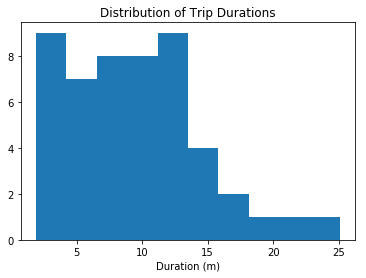

In [12]:
# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

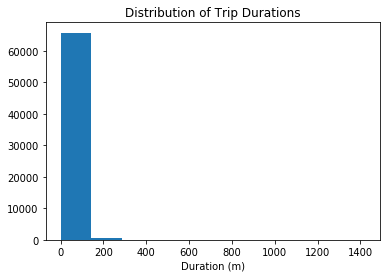

1422.5163666666667


In [13]:
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##
%matplotlib inline

with open('./data/Washington-2016-Summary.csv','r') as f_in:
    reader = csv.DictReader(f_in)
    data = list()
    for row in reader:
        data.append(float(row['duration']))
    plt.hist(data)
    plt.title('Distribution of Trip Durations')
    plt.xlabel('Duration (m)')
    plt.show()
    print(max(data))
    


If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: The peak for subscribers is in the range of (5,10] minutes, and the peak for customer group is in the range of (15,20] minutes. The sample size of the subscriber is almonst 4 times as large as customers'. Both of the histogram demonstrates skew normal distribution. According to the histogram created, both the distribution of subscribers and the customers of Washington follows a left-skewed normal distribution, which can be characterized by rapid rise and drop-off in frequency. Comparing the two histogram, we can see that the spread of the frequency of subscribers is much lower than the spread of customer, which indicates the standard deviation for the frequency of subscribers is lower compare to customers, which indicate that the subscribers tend to use the bike sharing system for shorter period of time than customers and their tend to use the service regularly as majority of subscriber trips is within 15 minutes.

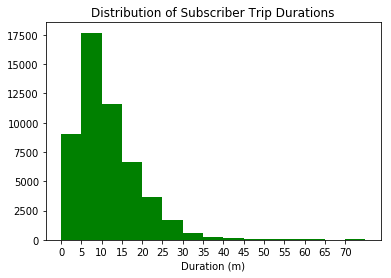

The sample size of subscriber: 51753


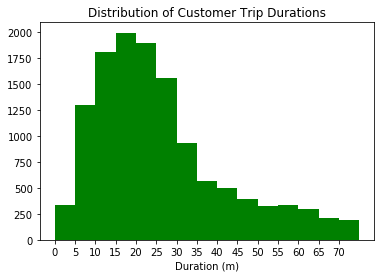

The sample size of customer: 14573


In [14]:
## Use this and additional cells to answer Question 5. ##
import numpy as np
with open('./data/Washington-2016-Summary.csv','r') as f_in:
    reader = csv.DictReader(f_in)
    subscriber_data = list()
    customer_data = list()
    for row in reader:
        if row['user_type'] == 'Subscriber':
            subscriber_data.append(float(row['duration']))
        else:
            customer_data.append(float(row['duration']))
    plt.hist(subscriber_data,bins = np.linspace(0, 75, num = 16), range = (0, 75), color = 'green')
    plt.title('Distribution of Subscriber Trip Durations')
    plt.xlabel('Duration (m)')
    plt.xticks(np.arange(0,75,5.0))
    plt.show()
    print('The sample size of subscriber: {}'.format(len(subscriber_data)))
    plt.hist(customer_data,bins = np.linspace(0, 75, num = 16), range = (0, 75), color = 'green')
    plt.title('Distribution of Customer Trip Durations')
    plt.xlabel('Duration (m)')
    plt.xticks(np.arange(0,75,5.0))
    plt.show()
    print('The sample size of customer: {}'.format(len(customer_data)))


<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**: In each city, the system is used most in the Summer, regardless of the user type, except for NYC, where the system is used most in the Fall for subscribers. That raises some interesting consideration: Is it because of the holiday season for student and they typically use bikes as part of the transportation in their short trip? Is it because of Summer is the peak season for tourism in these cities? All of these insight can be developed through further investigation of the data. 

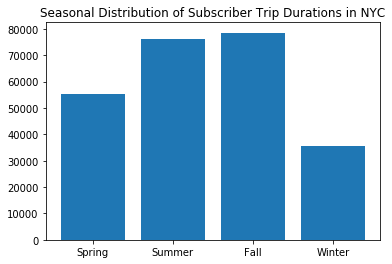

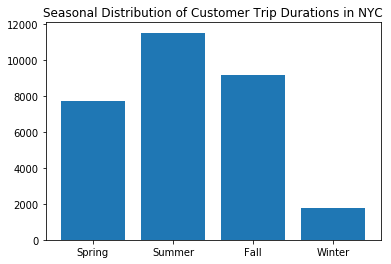

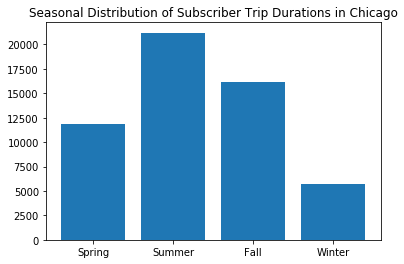

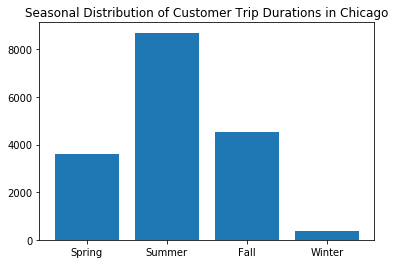

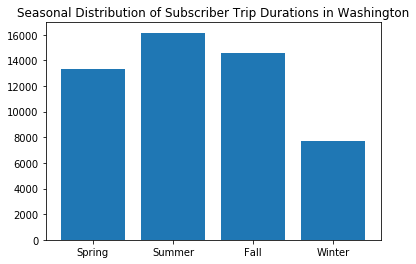

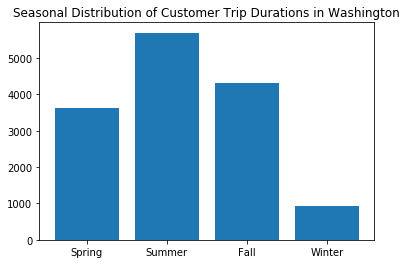

In [15]:
## Use this and additional cells to continue to explore the dataset. ##
## Once you have performed your exploration, document your findings  ##
## in the Markdown cell above. ##

#Explore the seasonal distribution for subscriber and customer trips in each city
def seasonal_analysis(filename, usertype):
    cityname = filename.split('-')[0][7:]
    with open(filename,'r') as f_in:
        reader = csv.DictReader(f_in)
        user_data = {'Spring':0, 'Summer':0, 'Fall':0, 'Winter':0}
        for row in reader:
            if row['user_type'] == usertype and row['month'] in ['3','4','5']:
                user_data['Spring'] += 1
            elif row['user_type'] == usertype and row['month'] in ['6','7','8']:
                user_data['Summer'] += 1
            elif row['user_type'] == usertype and row['month'] in ['9','10','11']:
                user_data['Fall'] += 1
            elif row['user_type'] == usertype and row['month'] in ['12','1','2']:
                user_data['Winter'] += 1
    dictionary = plt.figure()
    plt.bar(range(len(user_data)), user_data.values(), align='center')
    plt.title('Seasonal Distribution of {} Trip Durations in {}'.format(usertype, cityname))
    plt.xticks(range(len(user_data)), user_data.keys())
    
    
datafile = './data/NYC-2016-Summary.csv', './data/Chicago-2016-Summary.csv', './data/Washington-2016-Summary.csv'
for file in datafile:
    seasonal_analysis(file, 'Subscriber')
    seasonal_analysis(file, 'Customer')

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: The health service is another field that I would like to implement data science. With the health service data analytics. I can learn what kinds of health problems are more significant in a particular area than others. The data science in health service can enable health service provider to gain access to faster and timely aid for those who needs help and concern. Moreover, ordinary people can also get insight through getting access to those kind of data and learn how to prevent exposing to health risk factors. It is a large topic to discuss, but I believe that through the develop of data science and artificial intelligence, we can finally conquer cancer and change the world.
> **Tip**: If we want to share the results of our analysis with others, we aren't limited to giving them a copy of the jupyter Notebook (.ipynb) file. We can also export the Notebook output in a form that can be opened even for those without Python installed. From the **File** menu in the upper left, go to the **Download as** submenu. You can then choose a different format that can be viewed more generally, such as HTML (.html) or
PDF (.pdf). You may need additional packages or software to perform these exports.

> If you are working on this project via the Project Notebook page in the classroom, you can also submit this project directly from the workspace. **Before you do that**, you should save an HTML copy of the completed project to the workspace by running the code cell below. If it worked correctly, the output code should be a 0, and if you click on the jupyter icon in the upper left, you should see your .html document in the workspace directory. Alternatively, you can download the .html copy of your report following the steps in the previous paragraph, then _upload_ the report to the directory (by clicking the jupyter icon).

> Either way, once you've gotten the .html report in your workspace, you can complete your submission by clicking on the "Submit Project" button to the lower-right hand side of the workspace.

In [16]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysis.ipynb'])

0